# A year of Ludovico Einaudi ✨

In [224]:
import pandas as pd
import numpy as np
import datetime as dt

## 📙 Reading the Spotify data

In [225]:
df = pd.read_json('spotify-data/StreamingHistory0.json')

In [226]:
df.head(10)

,endTime,artistName,trackName,msPlayed
0,2019-09-25 15:24,Balmorhea,Masollan,285098
1,2019-09-25 18:10,Balmorhea,Clear Language,157221
2,2019-09-26 06:18,Shantala,Purnamadah,4274
3,2019-09-26 06:18,Daigo Hanada,Ouka,126527
4,2019-09-26 06:18,Bomba Estéreo,Algo Está Cambiando - Skip & Die Remix,28889
5,2019-09-26 06:18,DARKSIDE,Paper Trails,11633
6,2019-09-26 06:18,DARKSIDE,Paper Trails,5582
7,2019-09-26 06:23,DARKSIDE,Paper Trails,289841
8,2019-09-26 06:30,Nicolas Jaar,Mi Mujer,411125
9,2019-09-26 06:40,Victor Nebot,Man o To,574218


In [227]:
df.shape

(9316, 4)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     9316 non-null   object
 1   artistName  9316 non-null   object
 2   trackName   9316 non-null   object
 3   msPlayed    9316 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 291.2+ KB


## 🛠 A few data transformations

In [229]:
df.columns

Index(['endTime', 'artistName', 'trackName', 'msPlayed'], dtype='object')

In [230]:
#data.columns = [c.lower() for c in data.columns]
#data.columns = data.columns.str.lower()

df.columns = map(str.lower, df.columns)

In [231]:
df.columns

Index(['endtime', 'artistname', 'trackname', 'msplayed'], dtype='object')

In [232]:
df["endtime"] = pd.to_datetime(df["endtime"])
df["ym"] = df["endtime"].dt.strftime('%Y-%m')
df["yw"] = df["endtime"].dt.strftime('%Y-%W')
df["ymd"] = df["endtime"].dt.strftime('%Y-%m-%d')

In [233]:
df[["ym", "yw", "ymd"]].sample(5)

,ym,yw,ymd
4832,2020-04,2020-13,2020-04-01
5874,2020-04,2020-17,2020-04-29
5744,2020-04,2020-16,2020-04-24
7632,2020-06,2020-26,2020-06-30
5617,2020-04,2020-16,2020-04-20


In [234]:
df["hplayed"] = df["msplayed"] / 3600000

In [235]:
df["mplayed"] = df["msplayed"] / 60000

## 🎹 Zooming in on Ludovico Einaudi

In [236]:
dfle = df[df["artistname"]=="Ludovico Einaudi"]

In [237]:
dfle.head()

,endtime,artistname,trackname,msplayed,ym,yw,ymd,hplayed,mplayed
639,2019-10-10 07:20:00,Ludovico Einaudi,The Path Of The Fossils - Day 1,495576,2019-10,2019-40,2019-10-10,0.137660,8.259600
640,2019-10-10 07:26:00,Ludovico Einaudi,Ascent - Day 1,337372,2019-10,2019-40,2019-10-10,0.093714,5.622867
641,2019-10-10 07:27:00,Ludovico Einaudi,Low Mist Var. 2 - Day 1,82140,2019-10,2019-40,2019-10-10,0.022817,1.369000
642,2019-10-10 07:28:00,Ludovico Einaudi,I giorni,6171,2019-10,2019-40,2019-10-10,0.001714,0.102850
643,2019-10-10 07:31:00,Ludovico Einaudi,Una mattina,203800,2019-10,2019-40,2019-10-10,0.056611,3.396667


### Monthly df, hours played

In [238]:
dflem = dfle.groupby(by="ym", as_index=False).agg({"hplayed": "sum"})
dflem

,ym,hplayed
0,2019-10,3.687003
1,2019-11,2.508765
2,2019-12,8.756228
3,2020-01,0.659781
4,2020-02,11.314405
5,2020-03,3.488319
6,2020-04,1.957830
7,2020-05,2.555588
8,2020-06,2.031039
9,2020-07,3.724756


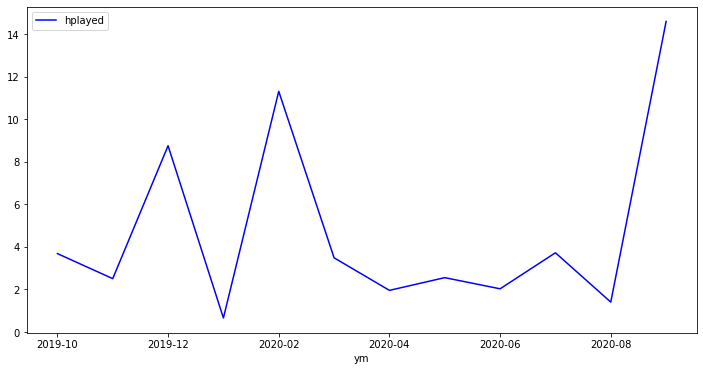

In [239]:
dflem.plot.line(x="ym", color="blue", figsize=(12,6))

### Daily df, hours and minutes played 

In [240]:
# creating the list of days first
start_date = np.min(dfle["endtime"])
end_date = np.max(dfle["endtime"])
print(start_date, end_date)

2019-10-10 07:20:00 2020-09-26 22:33:00


In [241]:
datelist = pd.DataFrame(pd.date_range(start='2019-09-27 00:00:00', end=end_date, freq='D').tolist())

In [242]:
datelist.columns = ["fulld"]
datelist["fulld"] = datelist["fulld"].dt.strftime('%Y-%m-%d')
datelist

,fulld
0,2019-09-27
1,2019-09-28
2,2019-09-29
3,2019-09-30
4,2019-10-01
...,...
361,2020-09-22
362,2020-09-23
363,2020-09-24
364,2020-09-25


In [243]:
# then grouping streaming data by day
dfled = dfle.groupby(by="ymd", as_index=False).agg({"hplayed": "sum", "mplayed": "sum"})
dfled

,ymd,hplayed,mplayed
0,2019-10-10,1.701968,102.118100
1,2019-10-11,0.027756,1.665350
2,2019-10-12,0.423983,25.438983
3,2019-10-13,0.061923,3.715400
4,2019-10-14,0.785966,47.157933
...,...,...,...
87,2020-09-22,1.041207,62.472433
88,2020-09-23,1.936124,116.167417
89,2020-09-24,1.953588,117.215267
90,2020-09-25,2.734716,164.082950


In [244]:
# and now joining the data together
dfledm = pd.merge(datelist, dfled, left_on="fulld", right_on="ymd", how="left")

In [245]:
dfledm.head(10)

,fulld,ymd,hplayed,mplayed
0,2019-09-27,NaN,NaN,NaN
1,2019-09-28,NaN,NaN,NaN
2,2019-09-29,NaN,NaN,NaN
3,2019-09-30,NaN,NaN,NaN
4,2019-10-01,NaN,NaN,NaN
5,2019-10-02,NaN,NaN,NaN
6,2019-10-03,NaN,NaN,NaN
7,2019-10-04,NaN,NaN,NaN
8,2019-10-05,NaN,NaN,NaN
9,2019-10-06,NaN,NaN,NaN


In [246]:
dfledm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fulld    366 non-null    object 
 1   ymd      92 non-null     object 
 2   hplayed  92 non-null     float64
 3   mplayed  92 non-null     float64
dtypes: float64(2), object(2)
memory usage: 14.3+ KB


In [247]:
dfledm["hplayed"] = dfledm["hplayed"].replace(np.nan, 0)

In [248]:
dfledm['SMA_7'] = dfledm.iloc[:,2].rolling(window=7).mean()
dfledm['SMA_7'] = round(pd.to_numeric(dfledm['SMA_7']), 3)
dfledm.head(20)

,fulld,ymd,hplayed,mplayed,SMA_7
0,2019-09-27,NaN,0.000000,NaN,NaN
1,2019-09-28,NaN,0.000000,NaN,NaN
2,2019-09-29,NaN,0.000000,NaN,NaN
3,2019-09-30,NaN,0.000000,NaN,NaN
4,2019-10-01,NaN,0.000000,NaN,NaN
5,2019-10-02,NaN,0.000000,NaN,NaN
6,2019-10-03,NaN,0.000000,NaN,0.000
7,2019-10-04,NaN,0.000000,NaN,0.000
8,2019-10-05,NaN,0.000000,NaN,0.000
9,2019-10-06,NaN,0.000000,NaN,0.000


In [249]:
#exporting data
dfledm[["fulld","hplayed"]].sort_values(by="fulld", ascending=True).to_csv("daily_hplayed.csv", index=False)
dfledm[["fulld","SMA_7"]].sort_values(by="fulld", ascending=True).to_csv("seven_day_avg_hplayed.csv", index=False)

Looking at the data in its various forms!

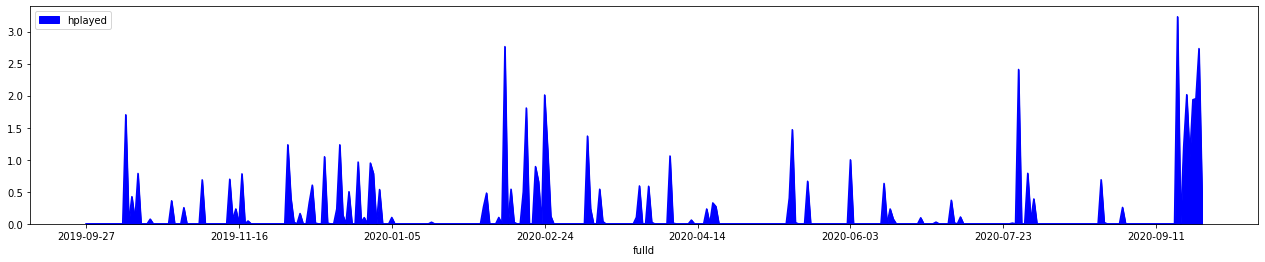

In [250]:
dfledm.plot.area(x="fulld", y="hplayed", color="blue", figsize=(22,4))

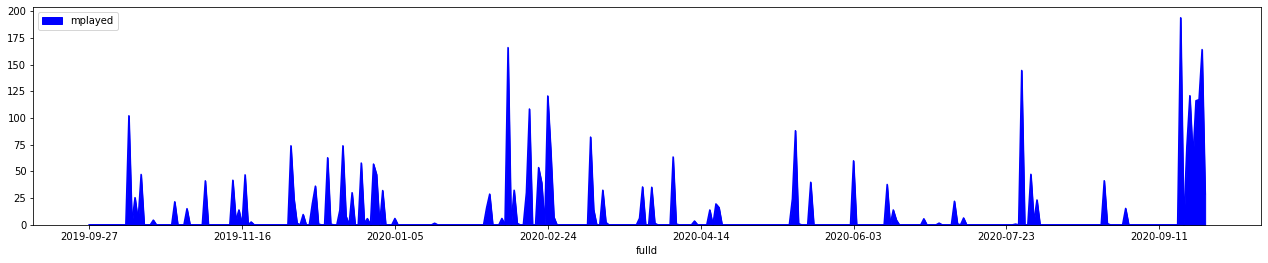

In [251]:
dfledm.plot.area(x="fulld", y="mplayed", color="blue", figsize=(22,4))

### Weekly df, hours played 

In [252]:
dfledm.head()

,fulld,ymd,hplayed,mplayed,SMA_7
0,2019-09-27,NaN,0.0,NaN,NaN
1,2019-09-28,NaN,0.0,NaN,NaN
2,2019-09-29,NaN,0.0,NaN,NaN
3,2019-09-30,NaN,0.0,NaN,NaN
4,2019-10-01,NaN,0.0,NaN,NaN


In [253]:
dfledm['fulld'] = pd.to_datetime(dfledm['fulld'])
dfledm['ymw'] = dfledm['fulld'].dt.to_period('W').apply(lambda r: r.start_time)

In [254]:
dfledm.head()

,fulld,ymd,hplayed,mplayed,SMA_7,ymw
0,2019-09-27,NaN,0.0,NaN,NaN,2019-09-23
1,2019-09-28,NaN,0.0,NaN,NaN,2019-09-23
2,2019-09-29,NaN,0.0,NaN,NaN,2019-09-23
3,2019-09-30,NaN,0.0,NaN,NaN,2019-09-30
4,2019-10-01,NaN,0.0,NaN,NaN,2019-09-30


In [255]:
dfledw = dfledm.groupby(by="ymw", as_index=False).agg({"hplayed":"sum"}).sort_values(by="ymw", ascending=True)
dfledw.head(10)

,ymw,hplayed
0,2019-09-23,0.000000
1,2019-09-30,0.000000
2,2019-10-07,2.215631
3,2019-10-14,0.859460
4,2019-10-21,0.359614
5,2019-10-28,0.252298
6,2019-11-04,0.686574
7,2019-11-11,1.777734
8,2019-11-18,0.044457
9,2019-11-25,0.000000


In [320]:
np.mean(dfledw.hplayed)

1.0695778721174003

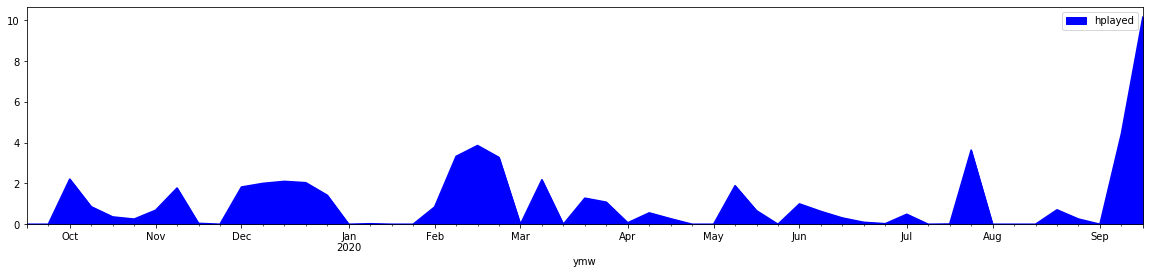

In [256]:
dfledw.plot.area(x="ymw", y="hplayed", color="blue", figsize=(20,4))

In [257]:
dfledw.sort_values(by="ymw", ascending=True).to_csv("weekly_hplayed.csv", index=False)

### Most listened tracks

In [312]:
dflet = dfle.groupby(by="trackname", as_index=False).agg({"hplayed": "sum", "mplayed": "sum"}).sort_values(by="hplayed", ascending=False)
dflet.head(10)

,trackname,hplayed,mplayed
98,Nuvole bianche,4.421925,265.315517
21,Campfire Var. 1 - Day 7,3.014294,180.857667
62,Gravity - Day 7,2.261280,135.676800
9,Ascent - Day 1,2.117961,127.077633
39,Divenire,2.022814,121.368817
13,Ascent - Day 7,1.505748,90.344900
111,The Path Of The Fossils - Day 1,1.499024,89.941450
66,In Un'altra Vita - Live / Remastered 2020,1.497117,89.827050
85,Low Mist Var. 2 - Day 6,1.345399,80.723933
40,Due Tramonti - Remastered 2020,1.150426,69.025550


In [313]:
d = {'Nuvole': 'Nuvole Bianche', 'Campfire': 'Campfire', 'Gravity': 'Gravity', 'Ascent': 'Ascent', 'The Path Of': 'The Path Of The Fossils',
    'A Sense ': 'A Sense Of Symmetry', 'Choros': 'Choros', 'Circles': 'Circles', 'Cold Wind':'Cold Wind', 'Elegy For The Arctic': 'Elegy For The Arctic',
    'Experience': 'Experience', 'Fox Tracks': 'Fox Tracks', 'Golden Butterflies': 'Golden Butterflies', 'High': 'High Heels', 
     "In un'altra vita": "In un'altra vita", 'Low Mist': 'Low Mist', 'Le ': 'Le Onde', 'Matches': 'Matches', 'The earth': 'The Earth Prelude',
     'Una m': 'Una Mattina', 'View From The Other Side': 'View From The Other Side', 'Birdsong': 'Birdsong', 'Full Moon': 'Full Moon'
    }

for k, v in d.items():
    dflet.loc[dflet['trackname'].str.startswith(k, na=False), 'trackname'] = v

In [314]:
d2 = {' / Remastered 2020': '', ' - Remastered 2020': '', ' - Live': '', 
      'Seven Days Walking / Day 2: Birdsong': 'Birdsong'
    }

for k, v in d2.items():
    dflet['trackname'] = dflet['trackname'].str.replace(k, v)

In [318]:
dflet.head(40)

,trackname,hplayed,mplayed
98,Nuvole Bianche,4.421925,265.315517
21,Campfire,3.014294,180.857667
62,Gravity,2.261280,135.676800
9,Ascent,2.117961,127.077633
39,Divenire,2.022814,121.368817
13,Ascent,1.505748,90.344900
111,The Path Of The Fossils,1.499024,89.941450
66,In Un'altra Vita,1.497117,89.827050
85,Low Mist,1.345399,80.723933
40,Due Tramonti,1.150426,69.025550


In [316]:
dfletg = dflet.groupby(by="trackname", as_index=False).agg({"hplayed": "sum"}).sort_values(by="hplayed", ascending=False)
dfletg["hplayed"] = round(dfletg["hplayed"],2)
dfletg.head(10)

,trackname,hplayed
46,Nuvole Bianche,5.13
39,Low Mist,4.90
3,Ascent,4.35
8,Campfire,3.54
28,Gravity,3.36
17,Divenire,2.02
57,The Path Of The Fossils,1.95
12,Cold Wind,1.57
31,In Un'altra Vita,1.50
0,A Sense Of Symmetry,1.47


In [317]:
dfletg.to_csv("by_track.csv", index=False)